In [1]:

from matplotlib import pyplot as plt
import pandas as pd
from utils import save_fig_for_raport, dataframe_to_latex_tabular 
from pandas.plotting import autocorrelation_plot
import pandas.plotting
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

In [2]:

raw_data = pd.read_csv('../datasets/raw/market_insights_overview_all_2022_04_26.csv', parse_dates=["date"])

# Filter away early 2018 data as it seems to contain errors
raw_data =raw_data .loc[raw_data ['date'] > '2018-12-01']

In [3]:

categories = pd.read_csv("../datasets/raw/solr_categories_all_2022_02_14.csv")
# Join market_insight table with category names
category_names = categories[[ "internal_doc_id", "title"]]
category_id_to_names_map = dict(map(lambda x: (x["internal_doc_id"], x["title"]), category_names.to_dict("records")))
category_name_to_id_map = dict(map(lambda x: (x["title"], x["internal_doc_id"]), category_names.to_dict("records")))

In [4]:


data_grouped = raw_data.groupby(['cat_id', "date"], as_index=False).sum()
data_grouped["date"] = pd.to_datetime(data_grouped["date"])
data_grouped["interest"] = data_grouped["hits"] + data_grouped["clicks"]

# Join with category names
data_grouped = pd.merge(data_grouped , category_names, how="left", left_on=["cat_id"], right_on=["internal_doc_id"])
data_grouped.rename(columns={"title": "cat_name"}, inplace=True)
data_grouped.drop(columns=["internal_doc_id"], inplace=True, axis=1)

data_chosen_categories = data_grouped[["interest", "date", "cat_id", "cat_name"]]
data = data_chosen_categories

In [13]:
import numpy as np
minimize_outliers = lambda x: x if (x <= (4 *std)) else  x * 0.3
vector_func = np.vectorize(minimize_outliers)

max_variance_threshold = 1.3
ok_variance_threshold = 0.8
min_variance_threshold = 0.4
larg_variance_ids = []
small_variance_ids = []
ok_variance_id = []

for cat_id in data["cat_id"].unique():
  filtered = data[data["cat_id"] == cat_id]
  std = filtered["interest"].std()
  filtered["interest"] = filtered["interest"].apply(minimize_outliers)

  scaler = StandardScaler()
  scaled = scaler.fit_transform(filtered["interest"].values.reshape(-1, 1))
  diff = pd.DataFrame(scaled).diff()
  std = diff.std()[0]
  if std < max_variance_threshold and std > ok_variance_threshold:
    ok_variance_id.append(cat_id)
  if std > max_variance_threshold:
  # if std < max_variance_threshold and std > ok_variance_threshold:
    # print(f"Category {cat_id} is too noisy with std {std}")
    larg_variance_ids.append(cat_id)
    # diff.plot()
    # print("std", std)
    # plt.show()
  if std < min_variance_threshold:
    # print(f"Category {cat_id} is too quiet with std {std}")
    small_variance_ids.append(cat_id)
    # diff.plot()
    # print("std", std)
    # plt.show()

print("Larg variance categories:", larg_variance_ids)
print("Small variance categories:", small_variance_ids)



/tmp/ipykernel_8235/2702321449.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["interest"] = filtered["interest"].apply(minimize_outliers)
/tmp/ipykernel_8235/2702321449.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["interest"] = filtered["interest"].apply(minimize_outliers)
/tmp/ipykernel_8235/2702321449.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Larg variance categories: [72, 77, 79, 123, 11081, 11217, 11286, 11334, 11403, 11992, 12108, 12265, 12283, 12449, 12511, 12531, 12535, 12698, 12985, 13007, 13054, 13158, 13193, 13206, 13224, 13229, 13230, 13231, 13232, 13233, 13235, 13236, 13238, 13239, 13240, 13241, 13242, 13268, 13298, 13300, 13358, 13372, 13373, 13378, 13383, 13393, 13406, 13470, 13516, 13525, 13549, 13576, 13599, 13600, 13601, 13602, 13603, 13610, 13613, 13618, 13621, 13633, 13638, 13640, 13673, 13676, 13711, 13714, 13716, 13721, 13729, 13747, 13748, 13772, 13775, 13776, 13779, 13815, 13816, 13837, 13841, 13843, 13847]
Small variance categories: [10053, 10320, 11037, 11041, 11048, 11456, 11781, 11817, 11932, 12781, 12950, 12991, 13323]


/tmp/ipykernel_8235/2702321449.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["interest"] = filtered["interest"].apply(minimize_outliers)
/tmp/ipykernel_8235/2702321449.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["interest"] = filtered["interest"].apply(minimize_outliers)
/tmp/ipykernel_8235/2702321449.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

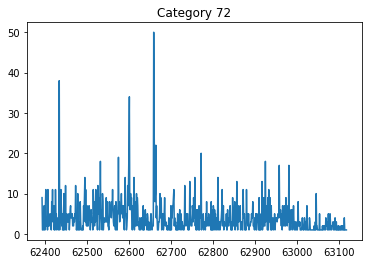

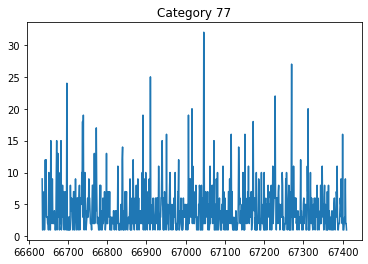

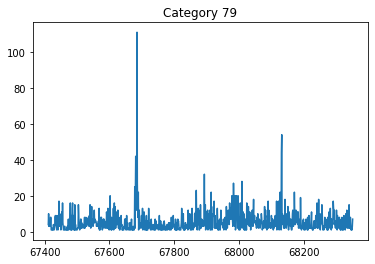

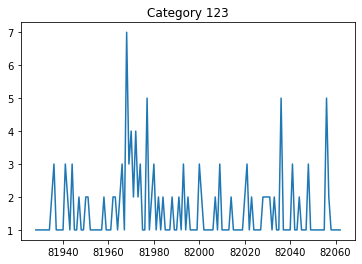

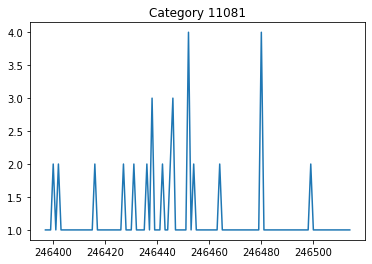

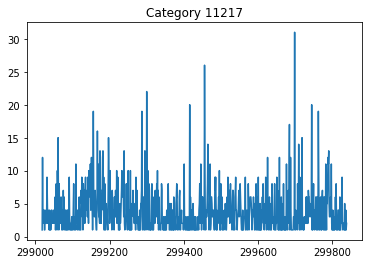

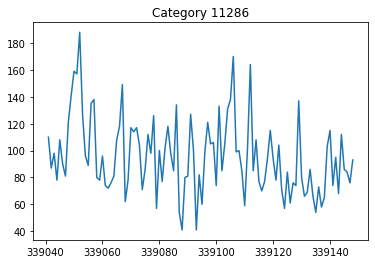

In [29]:
# for cat_id in small_variance_ids:
# for cat_id in ok_variance_id[:10]:
for cat_id in larg_variance_ids[:7]:
  filtered = data[data["cat_id"] == cat_id]
  filtered["interest"].plot(title=f"Category {cat_id}")
  plt.show()

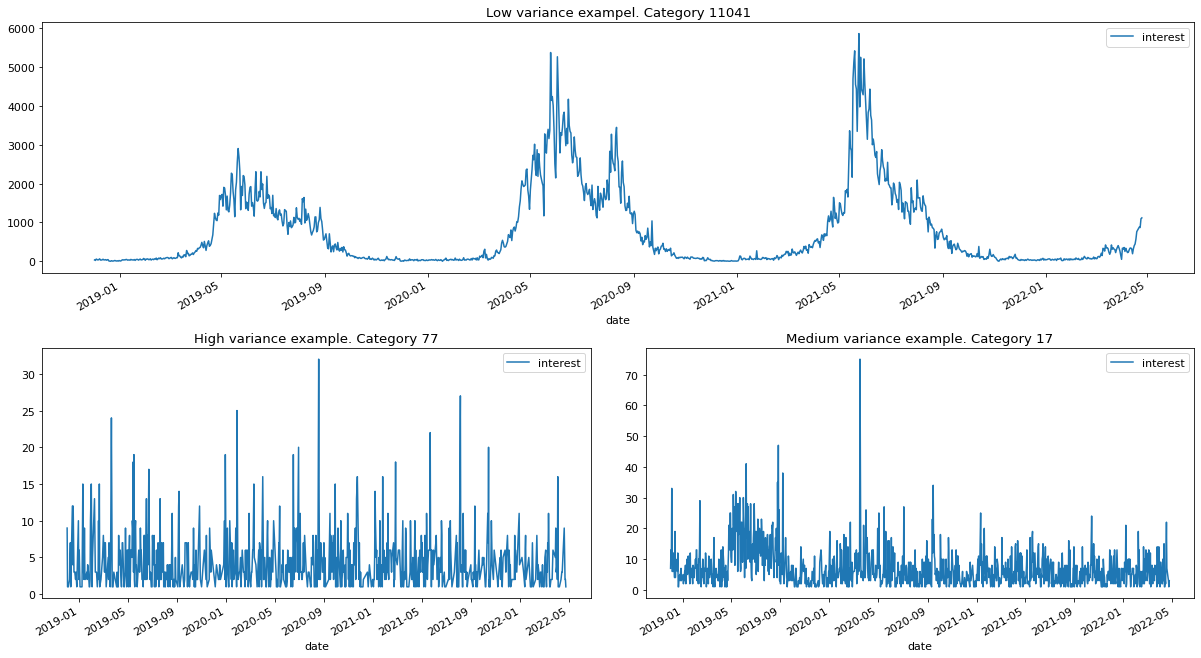

In [67]:
large_varaince_id = 11217
large_varaince_id = 77
low_variance_id =  11041
ok_variance_i =  17
large_var_series = data[data["cat_id"] == large_varaince_id][["interest", "date"]]
large_var_series.set_index("date", inplace=True)
low_variance_series = data[data["cat_id"] ==low_variance_id ][["interest", "date"]]
low_variance_series .set_index("date", inplace=True)
ok_variance_series= data[data["cat_id"] ==ok_variance_i ][["interest", "date"]]
ok_variance_series.set_index("date", inplace=True)

figure = plt.figure(1, figsize=(20, 10))
plt.subplot(2, 1, 1)
low_variance_series.plot(ax=plt.gca(), title=f"Low variance exampel. Category {low_variance_id}")
plt.subplot(2, 2, 3)
large_var_series.plot(ax=plt.gca(), title=f"High variance example. Category {large_varaince_id}")
plt.subplot(2, 2, 4)
ok_variance_series.plot(ax=plt.gca(), title=f"Medium variance example. Category {ok_variance_i}")

plt.rcParams['font.size'] = '11'
plt.tick_params(labelsize=11)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
plt.savefig("../MastersThesis/figs/code_generated/time-series-variance-examples.png")
